In [7]:

# Imports
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [8]:
# Load processed dataset
df = pd.read_csv("../data/fraud_data_ready.csv")

# Separate features and target
X = df.drop(columns=["class"])
y = df["class"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (120889, 203), Test shape: (30223, 203)


In [10]:
# Drop non-numeric columns before SMOTE
X_train_numeric = X_train.drop(columns=non_numeric_cols)

# Handle class imbalance
X_train_bal, y_train_bal = smote.fit_resample(X_train_numeric, y_train)

print("✅ SMOTE applied.")
print("Balanced class distribution:", y_train_bal.value_counts().to_dict())


✅ SMOTE applied.
Balanced class distribution: {0: 109568, 1: 109568}


In [11]:
# Train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_bal, y_train_bal)
print("✅ Random Forest model trained.")


✅ Random Forest model trained.


In [12]:
# Sample a small test set for SHAP (faster computation)
X_test_sample = X_test.sample(n=200, random_state=42)

print("✅ Sampled 200 test points for SHAP explainability.")


✅ Sampled 200 test points for SHAP explainability.


In [14]:
# Drop non-numeric columns from test sample
X_test_sample_numeric = X_test_sample.drop(columns=non_numeric_cols)

# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_sample_numeric)

print("✅ SHAP values computed.")


✅ SHAP values computed.


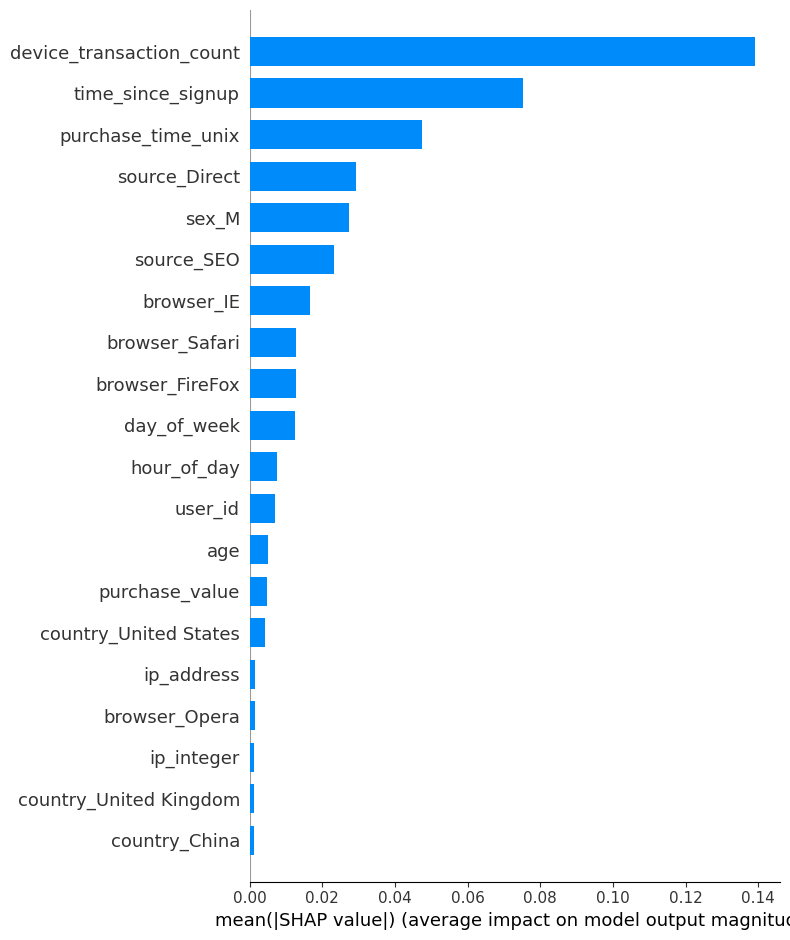

In [17]:
# Bar summary of global importance
# Select SHAP values for class 1 and reshape if needed
shap_values_class1 = shap_values[:, :, 1]  # shape: (n_samples, n_features)
shap.summary_plot(shap_values_class1, X_test_sample_numeric, plot_type="bar")


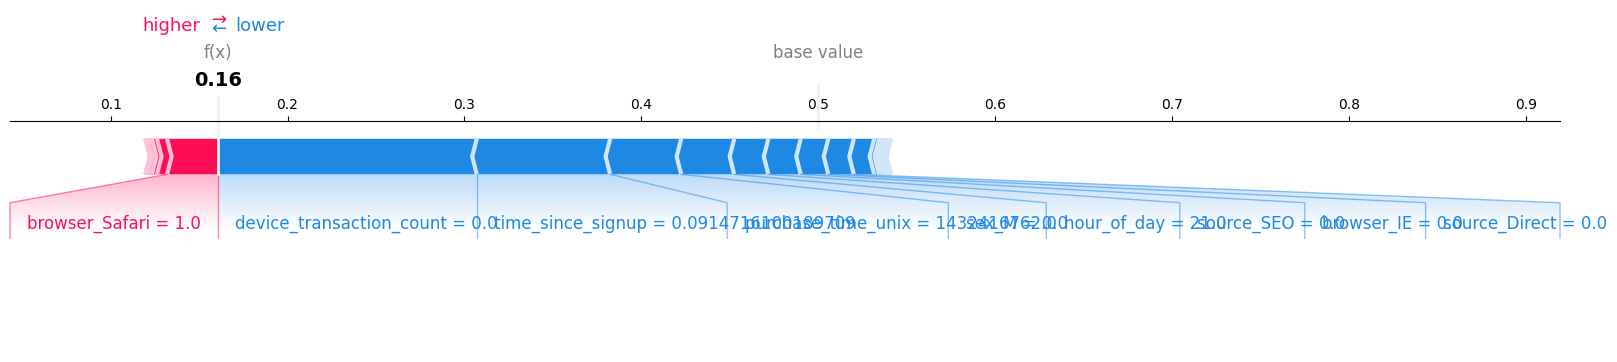

In [20]:
# Initialize JS (for better visuals)
shap.initjs()

# Explain a single instance
i = 5  # change index to any sample row
shap.force_plot(
    explainer.expected_value[1],
    shap_values_class1[i],
    X_test_sample_numeric.iloc[i],
    matplotlib=True
)


In [21]:
import shap
shap.initjs()

# Show force plot in cleaner layout
shap.plots.force(
    explainer.expected_value[1],
    shap_values_class1[i],
    X_test_sample_numeric.iloc[i]
)


<Figure size 20000x1000 with 0 Axes>

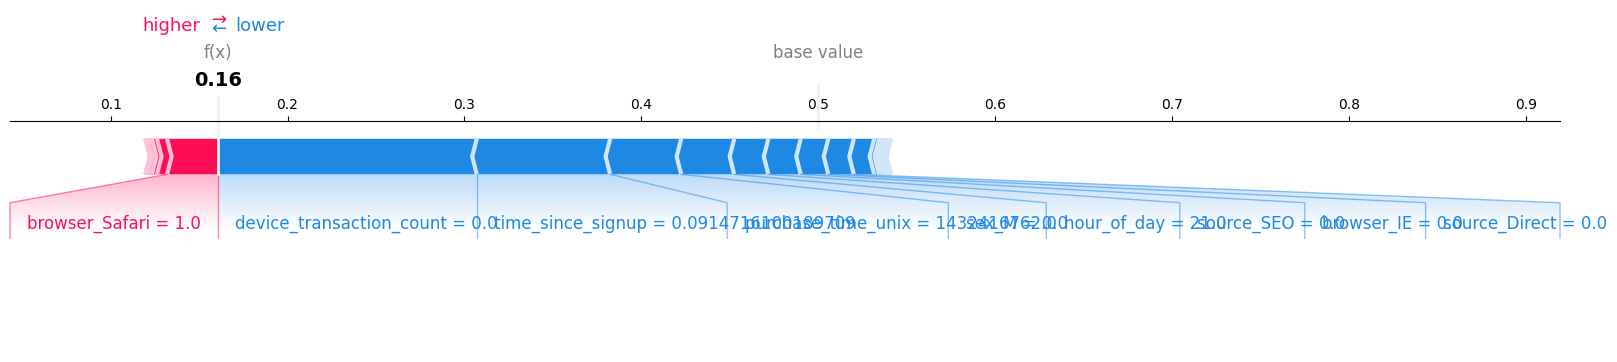

In [25]:
import matplotlib.pyplot as plt
import shap

shap.initjs()

# Set larger plot size
plt.figure(figsize=(200, 10))  # Wider and shorter
shap.force_plot(
    explainer.expected_value[1],
    shap_values_class1[i],
    X_test_sample_numeric.iloc[i],
    matplotlib=True
)


<Figure size 2200x300 with 0 Axes>

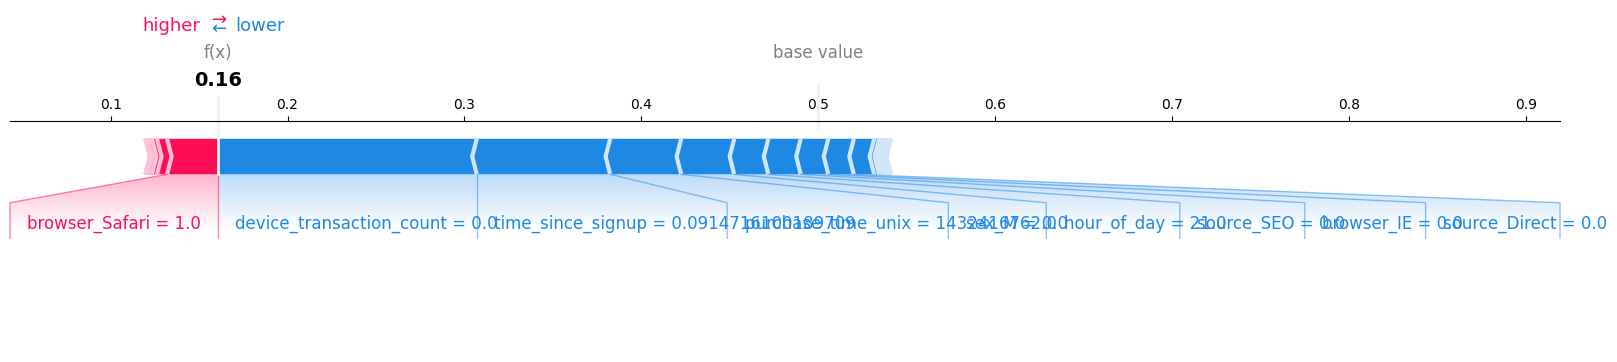

<Figure size 640x480 with 0 Axes>

In [30]:
import shap
import matplotlib.pyplot as plt

shap.initjs()

# Set wider and taller figure to reduce overlap
plt.figure(figsize=(22, 3))  # Try wider and lower height for horizontal spacing

# Generate force plot
shap.force_plot(
    explainer.expected_value[1],
    shap_values_class1[i],
    X_test_sample_numeric.iloc[i],
    matplotlib=True
)

# Ensure layout doesn’t overlap
plt.tight_layout()
plt.show()
